In [1]:
%config Completer.use_jedi = False
import pandas as pd

In [2]:
df_concrete=pd.read_csv(r'D:\ML\2 concrete_data_linear\Concrete_Data.csv')

In [3]:
df_concrete.head()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df_concrete.shape

(1030, 9)

### Lets check the null values 

In [5]:
df_concrete.isnull().sum()

Cement              0
Blast               0
Fly Ash             0
Water               0
Superplasticizer    0
CA                  0
FA                  0
Age                 0
CMS                 0
dtype: int64

### Lets check the datatypes of the columns

In [6]:
df_concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cement            1030 non-null   float64
 1   Blast             1030 non-null   float64
 2   Fly Ash           1030 non-null   float64
 3   Water             1030 non-null   float64
 4   Superplasticizer  1030 non-null   float64
 5   CA                1030 non-null   float64
 6   FA                1030 non-null   float64
 7   Age               1030 non-null   int64  
 8   CMS               1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


### lets check what is the  average comprehensive strength grouped by age

In [7]:
df_concrete.groupby('CMS').Age.sum()

CMS
2.33      3
3.32      3
4.57      3
4.78      3
4.83      3
         ..
79.40    56
79.99    28
80.20    56
81.75    28
82.60    91
Name: Age, Length: 845, dtype: int64

In [8]:
import seaborn as sns

<AxesSubplot:xlabel='Age', ylabel='CMS'>

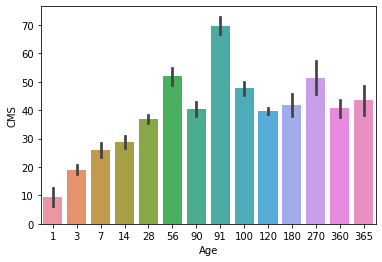

In [9]:
sns.barplot(x='Age',y='CMS',data=df_concrete)

### lets check the correlation matrix

In [10]:
df_concrete.corr()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
CA,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
FA,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
CMS,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


<AxesSubplot:>

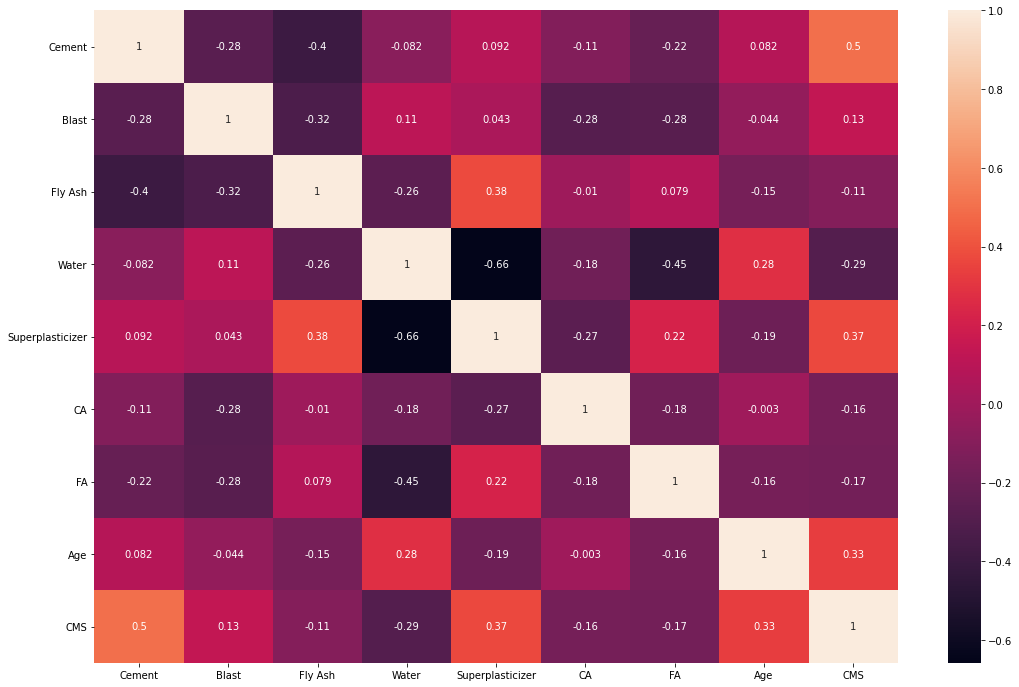

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,12))
sns.heatmap(df_concrete.corr(),annot=True)

### Lets describe the matrix

In [12]:
df_concrete.describe()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [13]:
df_concrete.groupby('CMS').Age.describe()

,count,mean,std,min,25%,50%,75%,max
CMS,,,,,,,,
2.33,1.0,3.0,NaN,3.0,3.0,3.0,3.0,3.0
3.32,1.0,3.0,NaN,3.0,3.0,3.0,3.0,3.0
4.57,1.0,3.0,NaN,3.0,3.0,3.0,3.0,3.0
4.78,1.0,3.0,NaN,3.0,3.0,3.0,3.0,3.0
4.83,1.0,3.0,NaN,3.0,3.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...
79.40,1.0,56.0,NaN,56.0,56.0,56.0,56.0,56.0
79.99,1.0,28.0,NaN,28.0,28.0,28.0,28.0,28.0
80.20,1.0,56.0,NaN,56.0,56.0,56.0,56.0,56.0


### Lets check the skewness of the dataset

In [14]:
df_concrete.skew()

Cement              0.509481
Blast               0.800717
Fly Ash             0.537354
Water               0.074628
Superplasticizer    0.907203
CA                 -0.040220
FA                 -0.253010
Age                 3.269177
CMS                 0.416977
dtype: float64

### Treating using log
there is some skewness which needs to be treated ,by seeing we can say only +ve skewness is signinficant and needs tto be treated

In [15]:
import numpy as np
df_concrete['Age']=np.log1p(df_concrete.Age)

In [16]:
df_concrete.skew()

Cement              0.509481
Blast               0.800717
Fly Ash             0.537354
Water               0.074628
Superplasticizer    0.907203
CA                 -0.040220
FA                 -0.253010
Age                -0.005085
CMS                 0.416977
dtype: float64

In [17]:
for col in df_concrete.columns:
    if df_concrete[col].skew()>0.55:
        df_concrete[col]=np.log1p(df_concrete[col])

In [18]:
df_concrete.skew()

Cement              0.509481
Blast              -0.032700
Fly Ash             0.537354
Water               0.074628
Superplasticizer   -0.324821
CA                 -0.040220
FA                 -0.253010
Age                -0.005085
CMS                 0.416977
dtype: float64

### lets check pairplot using seaborn library

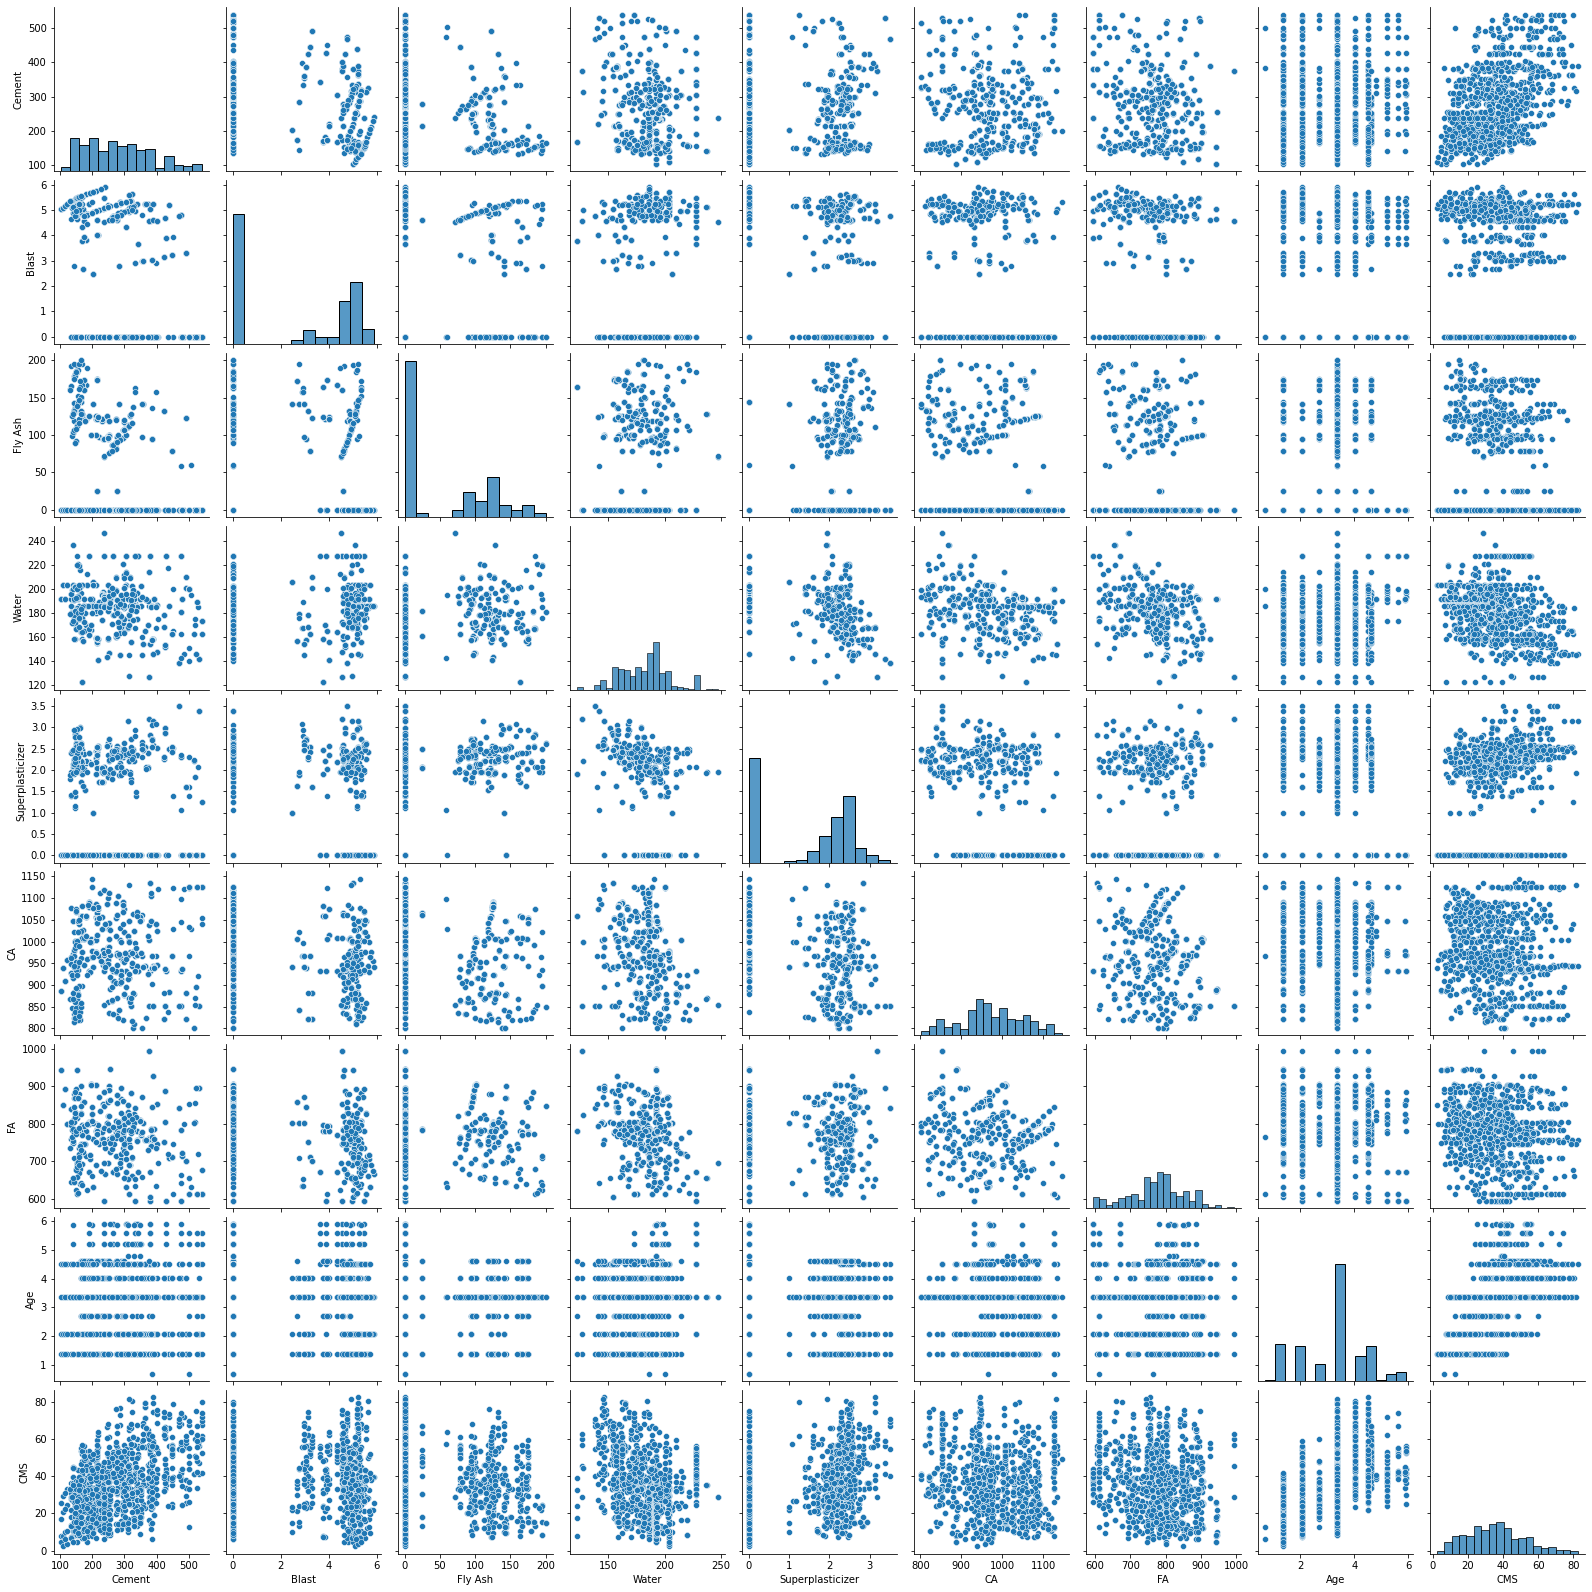

In [19]:
sns.pairplot(df_concrete)

In [20]:
from scipy.stats import zscore
z_score=abs(zscore(df_concrete))
print(df_concrete.shape)
df_concrete_final=df_concrete.loc[(z_score<3).all(axis=1)]
print(df_concrete_final.shape)

(1030, 9)
(1028, 9)


In [21]:
df_concrete_final

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.000000,0.0,162.0,1.252763,1040.0,676.0,3.367296,79.99
1,540.0,0.000000,0.0,162.0,1.252763,1055.0,676.0,3.367296,61.89
2,332.5,4.966335,0.0,228.0,0.000000,932.0,594.0,5.602119,40.27
3,332.5,4.966335,0.0,228.0,0.000000,932.0,594.0,5.902633,41.05
4,198.6,4.893352,0.0,192.0,0.000000,978.4,825.5,5.888878,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,4.762174,90.3,179.6,2.292535,870.1,768.3,3.367296,44.28
1026,322.2,0.000000,115.6,196.0,2.433613,817.9,813.4,3.367296,31.18
1027,148.5,4.944495,108.6,192.7,1.960095,892.4,780.0,3.367296,23.70
1028,159.1,5.234845,0.0,175.6,2.509599,989.6,788.9,3.367296,32.77


In [22]:
(z_score>3).all(axis=1)

array([False, False, False, ..., False, False, False])

In [23]:
z_score

array([[2.47791487, 1.05932371, 0.84714393, ..., 1.21767004, 0.11270216,
        2.64540763],
       [2.47791487, 1.05932371, 0.84714393, ..., 1.21767004, 0.11270216,
        1.56142148],
       [0.49142531, 1.00083701, 0.84714393, ..., 2.24091709, 2.1262525 ,
        0.26662698],
       ...,
       [1.27008832, 0.99177742, 0.85063487, ..., 0.0801067 , 0.11270216,
        0.72572939],
       [1.16860982, 1.11222168, 0.84714393, ..., 0.19116644, 0.11270216,
        0.18253855],
       [0.19403325, 0.85719292, 0.3769452 , ..., 0.15074782, 0.11270216,
        0.20469738]])

### seprating target and input variables

In [34]:
df_x=df_concrete_final.drop(columns=["CMS"])
y=df_concrete_final[["CMS"]]

###  scaling the imput variable

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [37]:
x.skew()

Cement              0.506929
Blast              -0.029014
Fly Ash             0.538466
Water               0.037290
Superplasticizer   -0.322343
CA                 -0.042301
FA                 -0.257366
Age                -0.004424
dtype: float64

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 55,test_size=0.20)

In [39]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range(42,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
    regr = linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)

max r2 score corresponding to  56  is  0.8308115498902517


In [40]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=10,scoring="r2").mean()

0.6613567398049393

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 56,test_size=0.20)
lreg = linear_model.LinearRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)

In [42]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("r2 score is : ",r2_score(y_test,y_pred))
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is :  0.8308115498902517
RMSE is :  7.061424236741104


In [47]:
import joblib
  
# Save the model as a pickle in a file 
joblib.dump(lreg, 'concrete.pkl')

['concrete.pkl']